In [73]:
%pylab inline
%matplotlib inline
n=30
m=3
J=48

Populating the interactive namespace from numpy and matplotlib


In [74]:
weights_file = '../weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
RR_file='../weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
EE1_file = '../CovMatricesAll/EE1_n%d_m%d_full.txt' %(n,m)
EE2_file = '../CovMatricesAll/EE2_n%d_m%d_full.txt' %(n,m)
Cx_file = '../CovMatricesJack/cxj_n%d_m%d_full.txt' %(n,m)
C2_file = '../CovMatricesJack/c2j_n%d_m%d_full.txt' %(n,m)
C3_file = '../CovMatricesJack/c3j_n%d_m%d_full.txt' %(n,m)
C4_file = '../CovMatricesJack/c4j_n%d_m%d_full.txt' %(n,m)

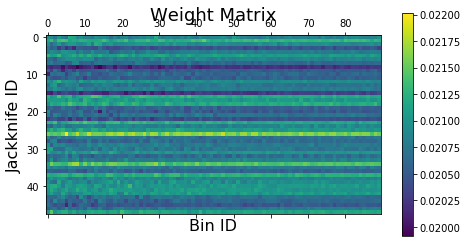

In [75]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Weight Matrix',fontsize=FS+2);

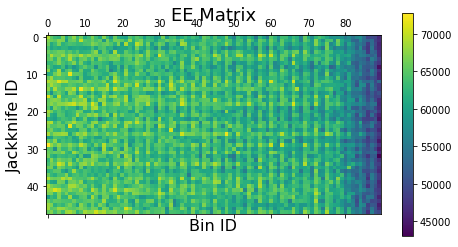

In [76]:
EEaA1=np.loadtxt(EE1_file)
EEaA2=np.loadtxt(EE2_file)
plt.matshow(EEaA1);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EE Matrix',fontsize=FS+2);

In [77]:
EEa1=np.sum(EEaA1,axis=0)
EEa2=np.sum(EEaA2,axis=0)

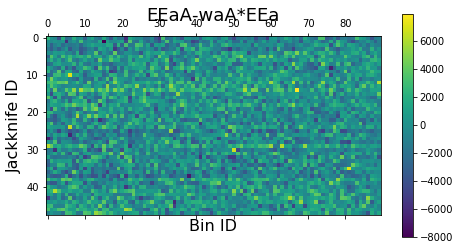

In [96]:
diffaA1=EEaA1-weights*EEa1
diffaA2=EEaA2-weights*EEa2
plt.matshow(diffaA1);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EEaA-waA*EEa',fontsize=FS+2);

In [105]:
RRa = np.loadtxt(RR_file)
RRaRRb=np.matmul(np.asmatrix(RRa).T,np.asmatrix(RRa))
fact=np.matmul(np.asmatrix(weights).T,np.asmatrix(weights))

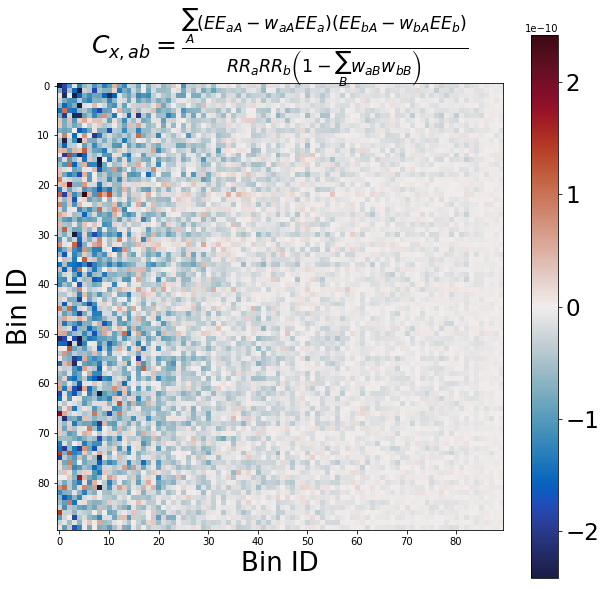

In [106]:
diff_mat=np.asarray(np.matmul(diffaA1.T,diffaA2)/np.matmul(fact,RRaRRb))
import cmocean
fig,ax=plt.subplots(1,figsize=(10,10))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=26;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

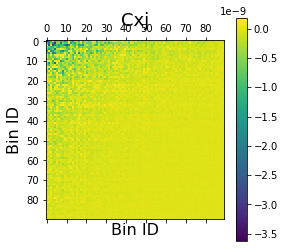

In [107]:
cxj=np.loadtxt(Cx_file)
plt.matshow(cxj,vmax=np.percentile(cxj.ravel(),99));FS=16;
plt.ylabel('Bin ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Cxj',fontsize=FS+2);

In [108]:
c_disconn=np.zeros_like(cxj)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA1[A,a]-weights[A,a]*EEa1[a])*(EEaA2[A,b]-weights[A,b]*EEa2[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

In [109]:
c_disconn11=np.zeros_like(cxj)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA1[A,a]-weights[A,a]*EEa1[a])*(EEaA1[A,b]-weights[A,b]*EEa1[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn11[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

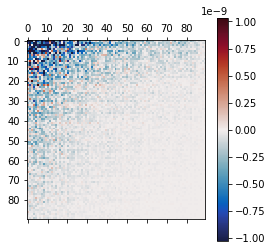

In [110]:
vmax=max(c_disconn.ravel())
plt.matshow(c_disconn,vmax=vmax,vmin=-vmax,cmap=cmocean.cm.balance)
plt.colorbar()

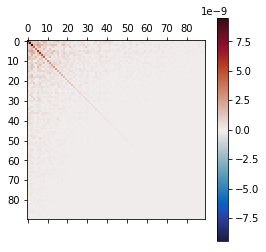

In [115]:
vmax=max(c_disconn11.ravel())
plt.matshow(c_disconn11,vmax=vmax,vmin=-vmax,cmap=cmocean.cm.balance)
plt.colorbar()

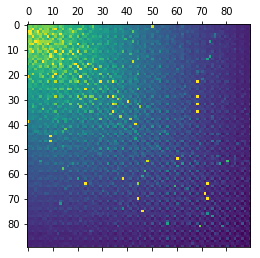

In [116]:
plt.matshow(c4j,vmax=np.percentile(c4j.ravel(),99.5))

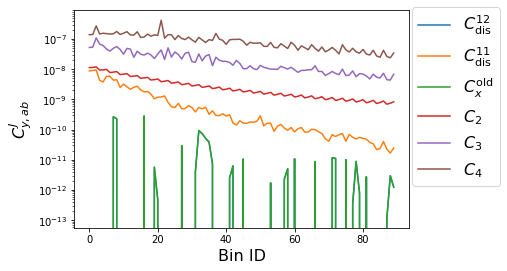

In [117]:
c2j=np.loadtxt(C2_file);
c3j=np.loadtxt(C3_file);c4j=np.loadtxt(C4_file)
plt.plot(np.diag(c_disconn),label=r'$C_\mathrm{dis}^{12}$')
plt.plot(np.diag(c_disconn11),label=r'$C_\mathrm{dis}^{11}$')
plt.plot(np.diag(cxj),label=r'$C_x^\mathrm{old}$')
plt.plot(c2j,label=r'$C_2$')
plt.plot(np.diag(c3j),label=r'$C_3$')
plt.plot(np.diag(c4j),label=r'$C_4$');
plt.xlabel('Bin ID',fontsize=FS);plt.ylabel(r'$C^J_{y,ab}$',fontsize=FS)
plt.legend(fontsize=FS,loc=9,bbox_to_anchor=(1.14,1.05));
plt.yscale('log')